![alt text](https://cienciadosdados.com/images/CINCIA_DOS_DADOS_4.png)
# <font color='Blue'>Ciência dos Dados na Prática</font>
# <font color='Red'>Prevendo Custo do Plano de Saúde</font>

![](https://static.poder360.com.br/2021/01/Fachada-Hospital-Sirio-Libanes-5-1024x683.jpg)

![](https://www.laceh.com.br/assets/img/time-health-21921b493ec688dafc41c449edddcba6a815387f12a2387b356e17c743905fd3.gif)

## O Brasil totalizou **48.566.216** beneficiários de planos de saúde em setembro de 2021. Este é o maior número de usuários desde abril de 2016.conforme ANS (Agência Nacional de Saúde Suplementar). Mesmo assim, mais de **60% dos brasileiros**, aproximadamente, **não possuem plano** de saúde.





![](http://patrocinados.estadao.com.br/coren/10-campos-de-protagonismo-da-enfermagem-na-saude/assets/img/listicle-2.gif)

### O mercado de planos de saúde no Brasil é bastante maduro e possui muitas empresas com diversos tipos de convênios para pessoas físicas e jurídicas


![](https://media2.giphy.com/media/fRg1cJrI9Sfb7Z1MS3/giphy.gif)

# 1° Problema de Negócio

#### Você foi contratado como Cientista de Dados da Operadora de Planos de Saúde **WSH - World Science Health**. Seu primeiro trabalho como Data Scientist é desenvolver uma metodologia para previsão do valor do plano de Saúde para seus beneficiários. 

# 2° Análise Exploratória

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Train dataset:
train_data = pd.read_csv('Train_Data.csv')
# Top 5 records:
train_data.head()

age     sex        bmi smoker     region  children       charges
0  21.000000    male  25.745000     no  northeast         2   3279.868550
1  36.976978  female  25.744165    yes  southeast         3  21454.494239
2  18.000000    male  30.030000     no  southeast         1   1720.353700
3  37.000000    male  30.676891     no  northeast         3   6801.437542
4  58.000000    male  32.010000     no  southeast         1  11946.625900

In [3]:
# Shape of dataset:
train_data.shape

(3630, 7)

In [4]:
# Cheacking for NaN Values (Missing Values):
train_data.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [ ]:
# Insights of dataset:
train_data.info()

In [6]:
# Description of dataset (Numerical):
train_data.describe()

age          bmi     children       charges
count  3630.000000  3630.000000  3630.000000   3630.000000
mean     38.887036    30.629652     2.503581  12784.808644
std      12.151029     5.441307     1.712568  10746.166743
min      18.000000    15.960000     0.000000   1121.873900
25%      29.000000    26.694526     1.000000   5654.818262
50%      39.170922    30.200000     3.000000   9443.807222
75%      48.343281    34.100000     4.000000  14680.407505
max      64.000000    53.130000     5.000000  63770.428010

In [7]:
# Description of dataset (Categorical):
train_data.describe(include=['O'])

sex smoker     region
count   3630   3630       3630
unique     2      2          4
top     male     no  southeast
freq    2029   3070       1021

#### Medical Insurance Charges:

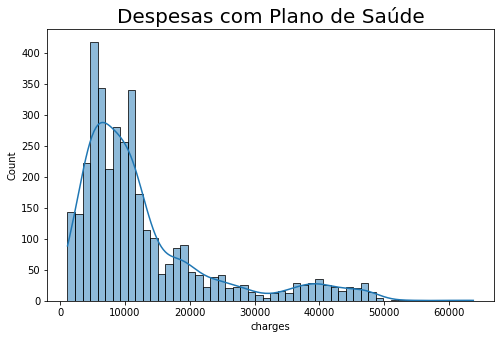

In [8]:
# Histrogram of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.histplot(train_data['charges'], kde=True)
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


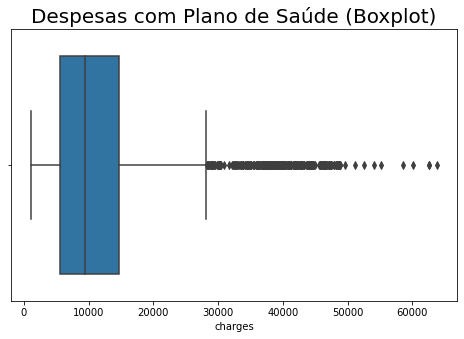

In [9]:
# Boxplot of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['charges'])
plt.title('Despesas com Plano de Saúde (Boxplot)', fontsize=20)
plt.show()

#### Age:

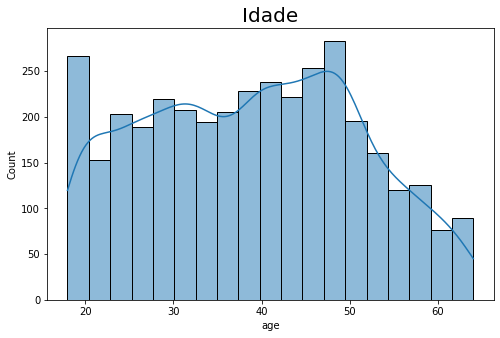

In [10]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(train_data['age'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


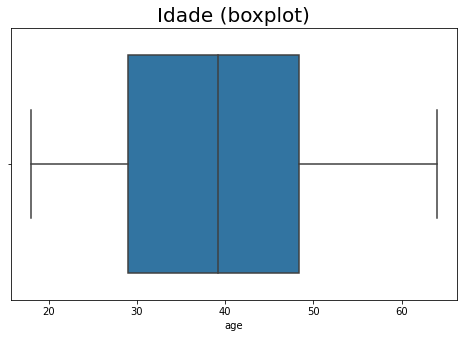

In [11]:
# Boxplot of Age:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['age'])
plt.title('Idade (boxplot)', fontsize=20)
plt.show()

#### Body Mass Index:

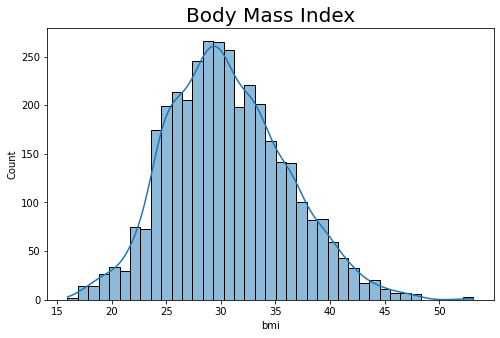

In [12]:
# Histrogram of Body Mass Index:
plt.figure(figsize=(8,5))
sns.histplot(train_data['bmi'], kde=True)
plt.title('Body Mass Index', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


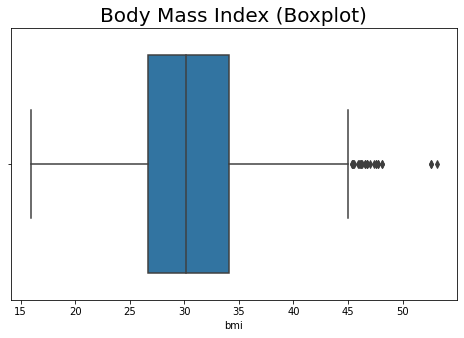

In [13]:
# Boxplot of Body Mass Index:
plt.figure(figsize=(8,5))
sns.boxplot(train_data['bmi'])
plt.title('Body Mass Index (Boxplot)', fontsize=20)
plt.show()

#### children:

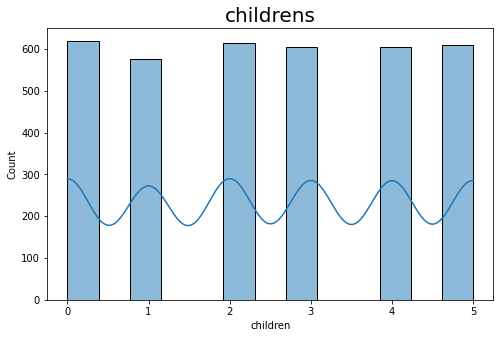

In [14]:
# Histrogram of children:
plt.figure(figsize=(8,5))
sns.histplot(train_data['children'], kde=True)
plt.title('childrens', fontsize=20)
plt.show()

In [15]:
# Boxplot of children:
plt.figure(figsize=(8,4))
sns.boxplot(train_data['children'])
plt.title('childrens (Boxplot)', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


#### Sex:

Male   : 2029
Female : 1601


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


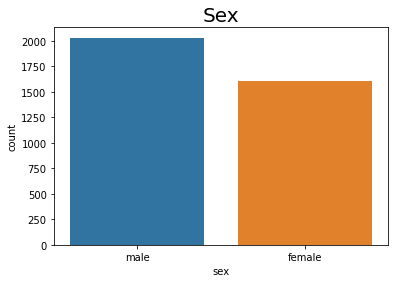

In [16]:
# Value Counts:
print("Male   :", train_data['sex'].value_counts()[0])
print("Female :", train_data['sex'].value_counts()[1])

# Visualization:
plt.figure(figsize=(6,4))
sns.countplot(train_data['sex'])
plt.title('Sex', fontsize=20)
plt.show()

#### Smokers:

Smokers     : 560
Non-Smokers : 3070


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


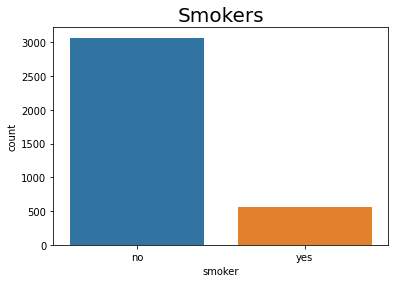

In [17]:
# Value Counts:
print("Smokers     :", train_data['smoker'].value_counts()[1])
print("Non-Smokers :", train_data['smoker'].value_counts()[0])

# Visualization:
sns.countplot(train_data['smoker'])
sns.countplot(train_data['smoker'])
plt.title('Smokers', fontsize=20)
plt.show()

#### Region:

South-East region : 1021
North-West region : 911
South-West region : 850
North-East region : 848


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


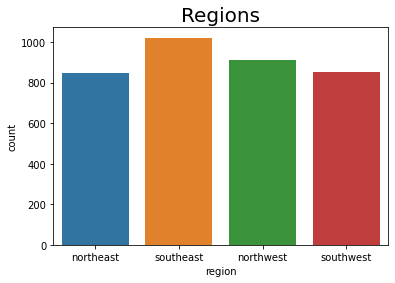

In [18]:
# Value Counts:
print("South-East region :", train_data['region'].value_counts()[0])
print("North-West region :", train_data['region'].value_counts()[1])
print("South-West region :", train_data['region'].value_counts()[2])
print("North-East region :", train_data['region'].value_counts()[3])

# Visualization:
sns.countplot(train_data['region'])
sns.countplot(train_data['region'])
plt.title('Regions', fontsize=20)
plt.show()

In [19]:
# top 5 records:
train_data.head()

age     sex        bmi smoker     region  children       charges
0  21.000000    male  25.745000     no  northeast         2   3279.868550
1  36.976978  female  25.744165    yes  southeast         3  21454.494239
2  18.000000    male  30.030000     no  southeast         1   1720.353700
3  37.000000    male  30.676891     no  northeast         3   6801.437542
4  58.000000    male  32.010000     no  southeast         1  11946.625900

#3° Pré-Processamento dos Dados

In [20]:
# Arredondar a Variável AGE:
train_data['age'] = round(train_data['age'])

In [21]:
# top 5 records, after rounding up & down Age:
train_data.head()

age     sex        bmi smoker     region  children       charges
0  21.0    male  25.745000     no  northeast         2   3279.868550
1  37.0  female  25.744165    yes  southeast         3  21454.494239
2  18.0    male  30.030000     no  southeast         1   1720.353700
3  37.0    male  30.676891     no  northeast         3   6801.437542
4  58.0    male  32.010000     no  southeast         1  11946.625900

In [22]:
# OHEncoding: Transformar variáveis em numéricas
train_data = pd.get_dummies(train_data, drop_first=True)

In [23]:
# top 2 records, after encoding:
train_data.head(2)

age        bmi  ...  region_southeast  region_southwest
0  21.0  25.745000  ...                 0                 0
1  37.0  25.744165  ...                 1                 0

[2 rows x 9 columns]

In [24]:
# Columns of dataset:
train_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [25]:
# Rearranging columns to see better: 
train_data = train_data[['age','sex_male','smoker_yes','bmi','children','region_northwest','region_southeast','region_southwest','charges']]
train_data.head(2)

age  sex_male  smoker_yes  ...  region_southeast  region_southwest       charges
0  21.0         1           0  ...                 0                 0   3279.868550
1  37.0         0           1  ...                 1                 0  21454.494239

[2 rows x 9 columns]

In [26]:
# Splitting Independent & Dependent Feature:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [27]:
# top 2 records of Independent feature:
X.head(2)

age  sex_male  ...  region_southeast  region_southwest
0  21.0         1  ...                 0                 0
1  37.0         0  ...                 1                 0

[2 rows x 8 columns]

In [ ]:
# top 2 records of Dependent Feature:
y.head(2)

In [29]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 4° e 5° Construção e Avaliação da Máquina Preditiva 


###Vamos Criar a metodologia de previsão do valor do custo do plano de saúde que é a própria máquina preditiva.

In [30]:
# Importing métricas de avaliação:
from sklearn.metrics import mean_squared_error, r2_score

### MP com Regressão Linear

In [31]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7482602892322038
30898859.035960782


### MP com Regressão Ridge

In [32]:
# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.748102888431925
30918178.614604652


### MP com Regressão Lasso

In [33]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7482269824960902
30902947.14800708


### MP com Random Forest

In [34]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9086559652588215
11211685.453341018


### Salvamento da Máquina Preditiva para Deploy ou implementação

In [36]:
# Creating a pickle file for the classifier
import pickle
filename = 'MedicalInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))

# Bônus de Participação 20C

#Fim

## Valeu!

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="220" src="https://www.youtube.com/embed/5isfMftOXV0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


![](https://www.clipartmax.com/png/full/248-2484462_pin-health-care-pictures-clip-art-health-gif.png)


